In [0]:
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.types import IntegerType, DoubleType
from pyspark import SparkFiles

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2)

import warnings
warnings.filterwarnings('ignore')

In [0]:
#구글 드라이버에서 다운로드 받을 파일의 URL
url = "https://drive.google.com/uc?id=1hLyqMbl5foc96lDJk6_KWJ_RLVOtIzIJ"



In [0]:
spark.sparkContext.addFile(url)


In [0]:
SparkFiles.getRootDirectory()

Out[4]: '/local_disk0/spark-2f061881-1bf7-4d2d-a6ef-86ecd6b9765f/userFiles-174100bb-929e-436b-88fe-7dda49b4952d'

In [0]:
os.listdir(SparkFiles.getRootDirectory())

Out[5]: ['uc']

In [0]:
df_train = spark.read.csv("file://"+SparkFiles.get('uc'), header=True)

In [0]:
type(df_train)

Out[7]: pyspark.sql.dataframe.DataFrame

In [0]:
df_train.schema

Out[8]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,StringType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,StringType,true),StructField(SibSp,StringType,true),StructField(Parch,StringType,true),StructField(Ticket,StringType,true),StructField(Fare,StringType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,StringType,true)))

In [0]:
df_train.schema.names

Out[9]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
column_name_list = df_train.columns

In [0]:
column_name_list

Out[12]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
column_name_list[1]

Out[13]: 'Pclass'

In [0]:
int_column_list = column_name_list[1:2]+column_name_list[5:7] + column_name_list[11:12]

In [0]:
int_column_list

Out[16]: ['Pclass', 'SibSp', 'Parch', 'Survived']

In [0]:
for column_name in int_column_list:

    print("column_name = ", column_name)
    df_train = df_train.withColumn(column_name, df_train[column_name].cast('int'))
    print('='*100)

column_name =  Pclass
column_name =  SibSp
column_name =  Parch
column_name =  Survived


In [0]:
df_train.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Survived: integer (nullable = true)



In [0]:
double_column_list = column_name_list[4:5] + column_name_list[8:9]

In [0]:
double_column_list

Out[24]: ['Age', 'Fare']

In [0]:
for column_name in double_column_list:

    print('column_name = ', column_name)
    df_train = df_train.withColumn(column_name, df_train[column_name].cast('double'))
    print('='*100)

column_name =  Age
column_name =  Fare


In [0]:
df_train.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Survived: integer (nullable = true)



In [0]:
df_train.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|       0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|       1|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|       0|
|          6|     3|    Moran, Mr. James|  male|null|    0|    0|          33087

In [0]:
display(df_train.summary())

summary,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891,891,891,891,714,891,891,891,891,204,889,891
mean,446.0,2.308641975308642,null,null,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,null,null,0.3838383838383838
stddev,257.3538420152301,0.8360712409770491,null,null,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,null,null,0.48659245426485753
min,1,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0.0,A10,C,0
25%,223.0,2,null,null,20.0,0,0,19996.0,7.8958,null,null,0
50%,446.0,3,null,null,28.0,0,0,236171.0,14.4542,null,null,0
75%,669.0,3,null,null,38.0,1,0,347743.0,31.0,null,null,1
max,99,3,"van Melkebeke, Mr. Philemon",male,80.0,8,6,WE/P 5735,512.3292,T,S,1


In [0]:
df_train.count()

Out[29]: 891

In [0]:
df_train.columns

Out[30]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
for column_name in df_train.columns:
    print('column_name = ', column_name)
    print('- -' *20)

column_name =  PassengerId
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Pclass
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Name
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Sex
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Age
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  SibSp
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Parch
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Ticket
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Fare
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Cabin
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Embarked
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
column_name =  Survived
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


In [0]:
df_train.select([count(column_name) for column_name in df_train.columns]).show()

+------------------+-------------+-----------+----------+----------+------------+------------+-------------+-----------+------------+---------------+---------------+
|count(PassengerId)|count(Pclass)|count(Name)|count(Sex)|count(Age)|count(SibSp)|count(Parch)|count(Ticket)|count(Fare)|count(Cabin)|count(Embarked)|count(Survived)|
+------------------+-------------+-----------+----------+----------+------------+------------+-------------+-----------+------------+---------------+---------------+
|               891|          891|        891|       891|       714|         891|         891|          891|        891|         204|            889|            891|
+------------------+-------------+-----------+----------+----------+------------+------------+-------------+-----------+------------+---------------+---------------+



In [0]:
df_train.select([count(column_name).alias(column_name) for column_name in df_train.columns]).show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|        891|   891| 891|891|714|  891|  891|   891| 891|  204|     889|     891|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [0]:
df_train.select( 
                [
                    count(when(isnan(column_name) | col(column_name).isNull(), column_name)).alias(column_name)
                    for column_name in df_train.columns
                ]
).show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|          0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|       0|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [0]:
df_train.select( 
                [
                    (count(when(isnan(column_name) | col(column_name).isNull(), column_name))/ df_train.count()).alias(column_name)
                    for column_name in df_train.columns
                ]
).show()

+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+
|PassengerId|Pclass|Name|Sex|                Age|SibSp|Parch|Ticket|Fare|             Cabin|            Embarked|Survived|
+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+
|        0.0|   0.0| 0.0|0.0|0.19865319865319866|  0.0|  0.0|   0.0| 0.0|0.7710437710437711|0.002244668911335578|     0.0|
+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+



Out[39]: <AxesSubplot:>

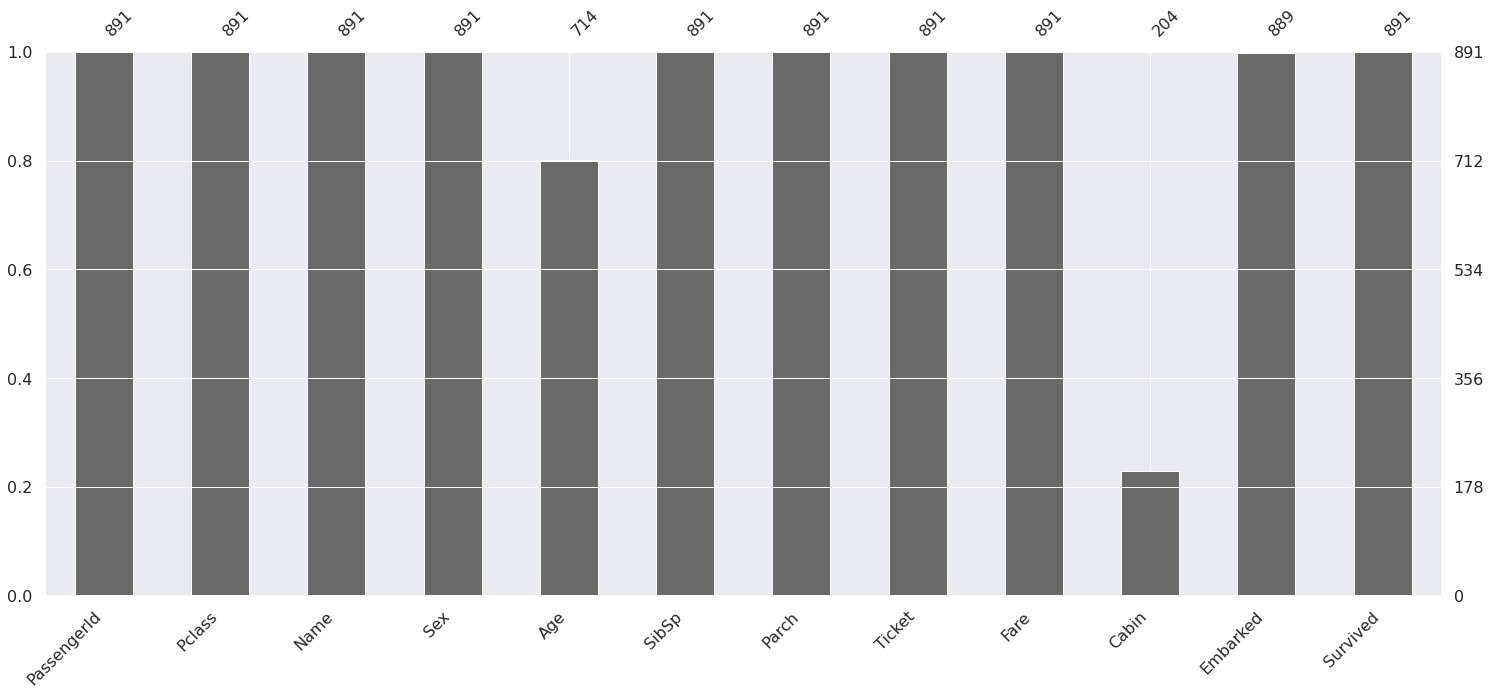

In [0]:
import missingno as msno
msno.bar(df=df_train.toPandas())

In [0]:
df_train.groupBy('Survived').count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



In [0]:
df_train.groupBy('Pclass').count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



In [0]:
df_train.createOrReplaceTempView('titanic_view')

In [0]:
%sql
select * from titanic_view where Survived=1

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,1
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S,1
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C,1
11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7,G6,S,1
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S,1
16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0,null,S,1
18,2,"Williams, Mr. Charles Eugene",male,null,0,0,244373,13.0,null,S,1
20,3,"Masselmani, Mrs. Fatima",female,null,0,0,2649,7.225,null,C,1


In [0]:
%sql
select Pclass from titanic_view where Survived=1

Pclass
1
3
1
3
2
3
1
2
2
3


In [0]:
%sql
select Pclass, count(*) from titanic_view where Survived =1 group by Pclass

Pclass,count(1)
1,136
3,119
2,87


In [0]:
%sql
select Pclass, Survived, count(*) from titanic_view group by Pclass, Survived order by Pclass, Survived desc

Pclass,Survived,count(1)
1,1,136
1,0,80
2,1,87
2,0,97
3,1,119
3,0,372


In [0]:
df_train.crosstab('Pclass', 'Survived').show()

+---------------+---+---+
|Pclass_Survived|  0|  1|
+---------------+---+---+
|              1| 80|136|
|              3|372|119|
|              2| 97| 87|
+---------------+---+---+



In [0]:
%sql
select Sex, Survived, count(*) from titanic_view group by Sex, Survived order by Sex, Survived desc

Sex,Survived,count(1)
female,1,233
female,0,81
male,1,109
male,0,468


In [0]:
df_train.crosstab('Sex', 'Survived').show()

+------------+---+---+
|Sex_Survived|  0|  1|
+------------+---+---+
|        male|468|109|
|      female| 81|233|
+------------+---+---+



Out[56]: <seaborn.axisgrid.FacetGrid at 0x7f6d99435a30>

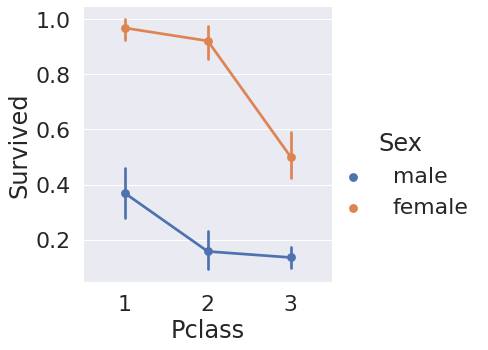

In [0]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = df_train.toPandas())

In [0]:
df_train.filter(df_train['Survived'] == 1).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+--------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|    Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+--------+-----+--------+--------+
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599| 71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|   7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|    53.1| C123|       S|       1|
|          9|     3|Johnson, Mrs. Osc...|female|27.0|    0|    2|          347742| 11.1333| null|       S|       1|
|         10|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|          237736| 30.0708| null|       C|       1|
|         11|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|       

In [0]:
df_train[['age']].filter(df_train['Survived'] == 1 ).show()

+----+
| age|
+----+
|38.0|
|26.0|
|35.0|
|27.0|
|14.0|
| 4.0|
|58.0|
|55.0|
|null|
|null|
|34.0|
|15.0|
|28.0|
|38.0|
|null|
|null|
|null|
|null|
|14.0|
| 3.0|
+----+
only showing top 20 rows



In [0]:
df_train[['Age']].filter(df_train['Survived'] == 0 ).show()

+----+
| Age|
+----+
|22.0|
|35.0|
|null|
|54.0|
| 2.0|
|20.0|
|39.0|
|14.0|
| 2.0|
|31.0|
|35.0|
| 8.0|
|null|
|19.0|
|null|
|40.0|
|66.0|
|28.0|
|42.0|
|21.0|
+----+
only showing top 20 rows



Out[60]: <matplotlib.legend.Legend at 0x7f6d7c168d60>

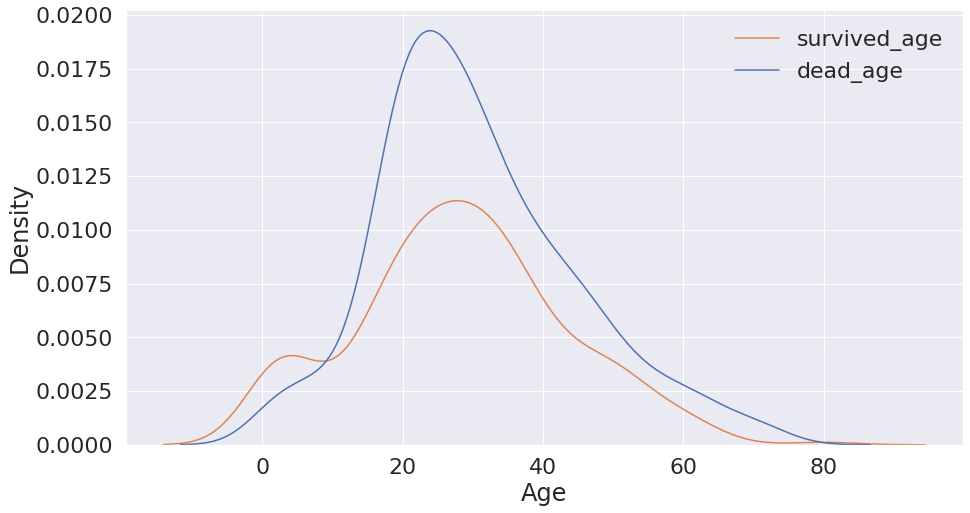

In [0]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df_train.toPandas(), x='Age', hue='Survived')
plt.legend(['survived_age', 'dead_age'])

In [0]:
%sql
select Embarked, Survived, count(*)
from titanic_view
group by Embarked, Survived
order by Embarked, Survived desc

Embarked,Survived,count(1)
null,1,2
C,1,93
C,0,75
Q,1,30
Q,0,47
S,1,217
S,0,427


In [0]:
df_train.crosstab('Embarked', 'Survived').show()

+-----------------+---+---+
|Embarked_Survived|  0|  1|
+-----------------+---+---+
|             null|  0|  2|
|                Q| 47| 30|
|                S|427|217|
|                C| 75| 93|
+-----------------+---+---+



In [0]:
df_train.crosstab('Embarked', 'Pclass').show()

+---------------+---+---+---+
|Embarked_Pclass|  1|  2|  3|
+---------------+---+---+---+
|              S|127|164|353|
|              Q|  2|  3| 72|
|              C| 85| 17| 66|
|           null|  2|  0|  0|
+---------------+---+---+---+



In [0]:
# 상관관계 파악
df_train.corr('Pclass', 'Survived')

Out[64]: -0.33848103596101514

In [0]:
for column in df_train.schema :
    
    print('column.name = ', column.name)
    print('column.dataType = ', column.dataType)
    print('='*80)

column.name =  PassengerId
column.dataType =  StringType
column.name =  Pclass
column.dataType =  IntegerType
column.name =  Name
column.dataType =  StringType
column.name =  Sex
column.dataType =  StringType
column.name =  Age
column.dataType =  DoubleType
column.name =  SibSp
column.dataType =  IntegerType
column.name =  Parch
column.dataType =  IntegerType
column.name =  Ticket
column.dataType =  StringType
column.name =  Fare
column.dataType =  DoubleType
column.name =  Cabin
column.dataType =  StringType
column.name =  Embarked
column.dataType =  StringType
column.name =  Survived
column.dataType =  IntegerType


In [0]:
for column in df_train.schema :
    
    print('column.name = ', column.name)
    print('column.dataType = ', column.dataType)
    
    if (column.dataType == IntegerType()) or (column.dataType == DoubleType()):
        print('numeric type')
    print('=' * 80)

column.name =  PassengerId
column.dataType =  StringType
column.name =  Pclass
column.dataType =  IntegerType
numeric type
column.name =  Name
column.dataType =  StringType
column.name =  Sex
column.dataType =  StringType
column.name =  Age
column.dataType =  DoubleType
numeric type
column.name =  SibSp
column.dataType =  IntegerType
numeric type
column.name =  Parch
column.dataType =  IntegerType
numeric type
column.name =  Ticket
column.dataType =  StringType
column.name =  Fare
column.dataType =  DoubleType
numeric type
column.name =  Cabin
column.dataType =  StringType
column.name =  Embarked
column.dataType =  StringType
column.name =  Survived
column.dataType =  IntegerType
numeric type


In [0]:
numeric_column_list = []

for column in df_train.schema :
    
    print('column.name = ', column.name)
    print('column.dataType = ', column.dataType)
    
    if (column.dataType == IntegerType()) or (column.dataType == DoubleType()):
        print('numeric type')
        numeric_column_list.append(column.name)

    print('=' * 80)

column.name =  PassengerId
column.dataType =  StringType
column.name =  Pclass
column.dataType =  IntegerType
numeric type
column.name =  Name
column.dataType =  StringType
column.name =  Sex
column.dataType =  StringType
column.name =  Age
column.dataType =  DoubleType
numeric type
column.name =  SibSp
column.dataType =  IntegerType
numeric type
column.name =  Parch
column.dataType =  IntegerType
numeric type
column.name =  Ticket
column.dataType =  StringType
column.name =  Fare
column.dataType =  DoubleType
numeric type
column.name =  Cabin
column.dataType =  StringType
column.name =  Embarked
column.dataType =  StringType
column.name =  Survived
column.dataType =  IntegerType
numeric type


In [0]:
numeric_column_list

Out[68]: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [0]:
for column_name in numeric_column_list:
    
    print('column_name = ', column_name)
    print(df_train.corr(column_name, 'Survived'))
    print('=' * 80)

column_name =  Pclass
-0.33848103596101514
column_name =  Age
0.010539215871285685
column_name =  SibSp
-0.03532249888573558
column_name =  Parch
0.08162940708348336
column_name =  Fare
0.2573065223849626
column_name =  Survived
1.0
